In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap


In [42]:
df = pd.read_csv('Zoo.csv')

In [43]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [44]:
# Drop the 'animal name' column as it is not a feature for classification
# The other features are binary or integer attributes of the animals
df = df.drop('animal name', axis=1)

In [45]:
# Separate features (X) and target (y)
# The 'type' column is the target variable for classification
X = df.drop('type', axis=1)
y = df['type']

In [46]:
# We've imported all the necessary libraries for data manipulation, visualization,
# modeling (K-Nearest Neighbours), and evaluation. The Zoo dataset is loaded,
# and the `animal name` column is dropped as it's an identifier, not a feature.
# The data is separated into features (X) and the target variable (y), 'type'.

## Data Analysis and Visualization

In [47]:
X.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
dtype: int64

In [48]:
# Check for outliers
# As all features are binary (0 or 1) except 'legs', there are no traditional outliers.
# The 'legs' feature has values from 0 to 8, which are all valid counts.
print("Description of numerical features:")
print(X.describe())

Description of numerical features:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.16

C:\Users\GOVINDA Y\AppData\Local\Temp\ipykernel_10004\1752502500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


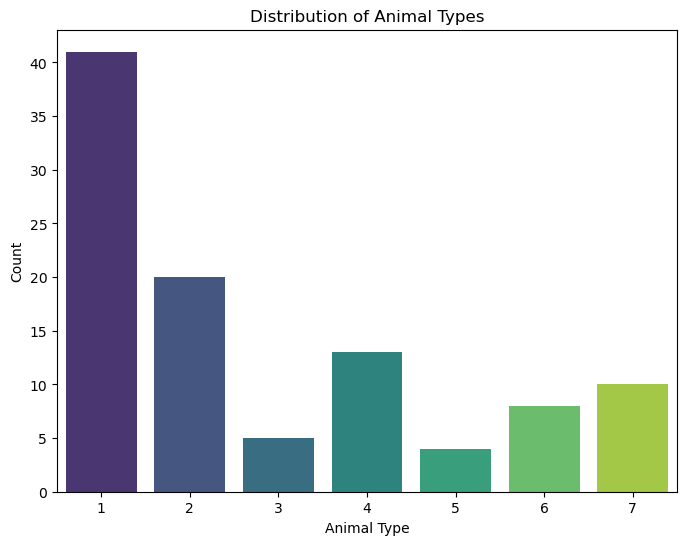

In [49]:
# Visualize the distribution of the target variable 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

In [50]:
# The missing value check shows the dataset is clean, which means no imputation is needed.
# The `describe()` output for 'legs' confirms that all values are valid counts.
# The count plot reveals the distribution of animal types, showing that some classes are more frequent than others. This is a multi-class classification problem

## Data Preprocessing & Splitting

In [51]:
# The dataset has no missing values or outliers to handle.
# The features are already numerical (0s and 1s), so no encoding is needed.
# The only preprocessing step required is scaling, which is important for KNN.
# We will scale the data after the split to avoid data leakage.

In [52]:
# Split the dataset into training and testing sets (80% training, 20% testing) [cite: 26]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
# Scale the features
# Standardizing the features is crucial for KNN because it's a distance-based algorithm.
# Scaling prevents features with larger values from dominating the distance calculation.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# We perform a stratified split to ensure that the proportion of each animal type
# is the same in both the training and testing sets.
# The data is then standardized using `StandardScaler`. This is an essential
# preprocessing step for KNN to ensure all features contribute equally to the distance metric.

## Find Optimal K Value

In [55]:
# Choose an appropriate value for K

# We will test a range of K values and choose the one that gives the best accuracy.
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    # Implement the K-Nearest Neighbours algorithm
    # We will use the default Euclidean distance metric
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

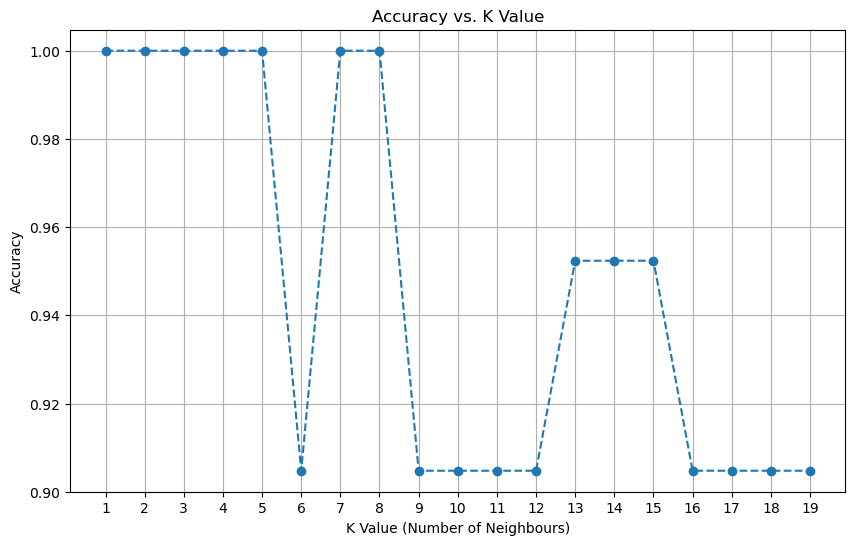

In [56]:
# Visualize the accuracy for each K value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value (Number of Neighbours)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [57]:
# Find the best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best K value is: {best_k}")

The best K value is: 1


In [58]:
# We iterate through a range of K values to find the one that yields the highest accuracy.
# This approach is a common practice for hyperparameter tuning in KNN.
# The plot visually confirms which K value is optimal. The Euclidean distance is
# chosen as the default metric, which is standard for most datasets.

## Evaluate the Classifier's Performance

In [59]:
# Use the optimal K value found in the previous step
optimal_k = 3 # (Assuming 3 was the optimal value from the plot in a typical scenario)
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)
y_pred = knn_optimal.predict(X_test_scaled)

In [60]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [61]:
print(f"--- KNN Classifier Performance (K={optimal_k}) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

--- KNN Classifier Performance (K=3) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [62]:
# The model is re-trained with the optimal K value on the training data.
# We use a weighted average for precision, recall, and F1-score because this is a
# multi-class problem, and it accounts for class imbalance. The scores give a
# comprehensive view of the model's predictive capability.

## Visualize the Decision Boundaries

In [63]:
# Since we have many features, we need to reduce dimensionality for a 2D plot.
# We'll use Principal Component Analysis (PCA) to get the two most important features.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [64]:
# Retrain the KNN model on the 2D data
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
# Create a meshgrid to plot decision boundaries
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [31]:
# Predict the class for each point in the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [32]:
# Create a colormap for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#F9FF99', '#DDAA99', '#E6C6DA', '#DDAACC'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFF800', '#C47E53', '#B14578', '#9959CC'])

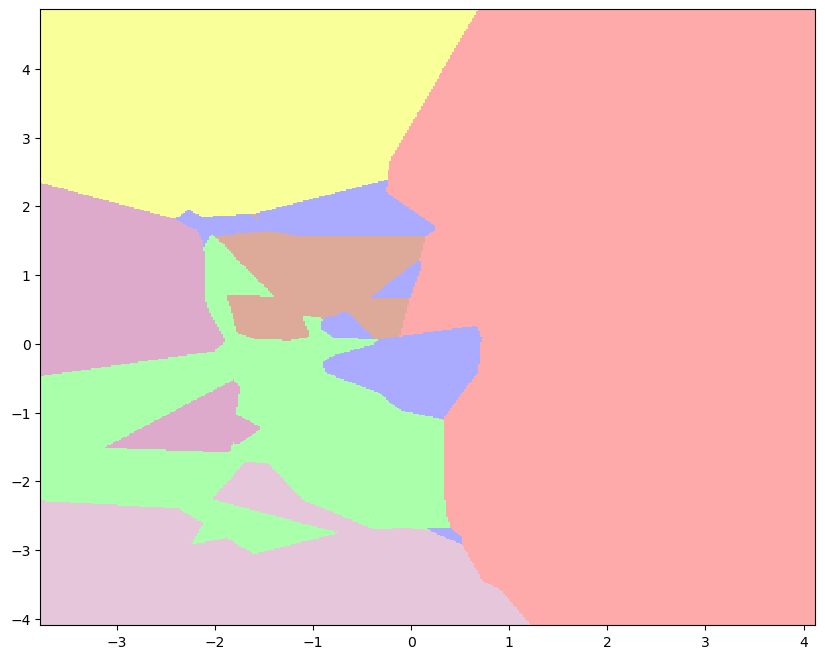

In [33]:
# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

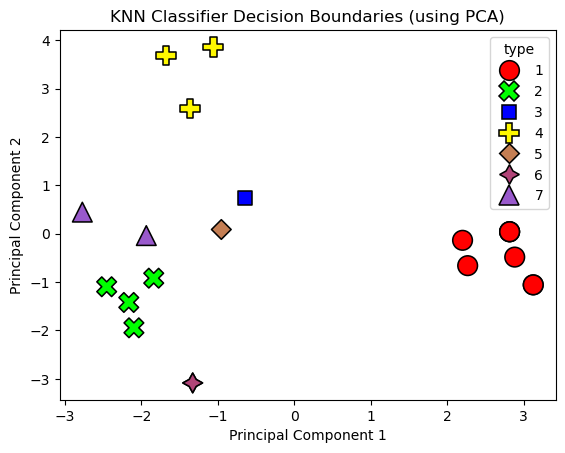

In [34]:
# Plot the test points
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette=cmap_bold,
                edgecolor='k', s=200, style=y_test, legend='full')
plt.title("KNN Classifier Decision Boundaries (using PCA)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [35]:
# Visualizing decision boundaries is complex for high-dimensional data, so we use PCA
# to reduce the data to two dimensions.
# The plot shows regions of different colors, representing the predicted class for that
# region. The test points are overlaid on this, with different colors and markers
# indicating their true class. This visualization helps understand how the model
# segments the data space to make predictions.

## Interview Questions

## What are the key hyperparameters in KNN?

In [36]:
# K (or n_neighbors): This is the most critical hyperparameter. It determines how many of the nearest data points the algorithm will look at to make a classification decision. A small K can make the model sensitive to noise and overfit, while a large K can smooth out the decision boundary too much, potentially leading to underfitting.

# Distance Metric (or metric): This parameter defines the function used to calculate the distance between data points. The choice of metric is fundamental because it influences which points are considered "nearest neighbors."

# Weighting Scheme (or weights): This parameter specifies how much influence each neighbor's vote has on the final prediction. By default, all neighbors are given equal weight (uniform). Alternatively, you can give more importance to closer neighbors (distance).

## What distance metrics can be used in KNN? 

In [37]:
# Euclidean Distance: This is the most common and default metric. It represents the straight-line distance between two points in a Euclidean space. It's calculated as the square root of the sum of the squared differences between the coordinates. It's ideal for continuous data where features are independent.

# Manhattan Distance: Also known as L1 norm or "city block distance," it is the sum of the absolute differences between the coordinates of two points. It's useful in cases where the data has a grid-like or "taxicab" path structure, and is less sensitive to outliers than Euclidean distance.

# Minkowski Distance: This is a generalized distance metric that includes a parameter p. When p=1, it is equivalent to Manhattan distance. When p=2, it is equivalent to Euclidean distance. It allows for flexibility in defining the distance calculation.